# Compare Scores

Load the comparison outputs and surface improvements/regressions.

In [20]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

out_dir = Path("comparison_out")
long_df = pd.read_csv(out_dir / "metrics_comparison_long.csv")
wide_df = pd.read_csv(out_dir / "metrics_comparison_wide.csv")

long_df.head()

,model,category,subcategory,metric_name,orig_value,aug_value,delta,delta_pct,orig_error_file_count,orig_error_item_count,aug_error_file_count,aug_error_item_count
0,azure-gpt-4o-FC,live,overall,ast_summary,70.10,68.10,-2.00,-0.028531,6,588,6,601
1,azure-gpt-4o-FC,live,overall,irrelevance_detection,79.41,81.22,1.81,0.022793,6,588,6,601
2,azure-gpt-4o-FC,live,overall,live_overall_acc,70.10,68.10,-2.00,-0.028531,6,588,6,601
3,azure-gpt-4o-FC,live,overall,python_multiple_ast,70.09,68.09,-2.00,-0.028535,6,588,6,601
4,azure-gpt-4o-FC,live,overall,python_parallel_ast,62.50,68.75,6.25,0.100000,6,588,6,601


In [21]:
acc_mask = long_df["metric_name"].str.contains("acc|accuracy", case=False, na=False)
acc_df = long_df[acc_mask].sort_values("delta", ascending=False)
acc_df.head(20)

,model,category,subcategory,metric_name,orig_value,aug_value,delta,delta_pct,orig_error_file_count,orig_error_item_count,aug_error_file_count,aug_error_item_count
14,azure-gpt-4o-FC,non_live,overall,non_live_overall_acc,84.67,83.79,-0.88,-0.010393,7,199,7,214
2,azure-gpt-4o-FC,live,overall,live_overall_acc,70.10,68.10,-2.00,-0.028531,6,588,6,601
22,azure-gpt-5.1-responses-FC,live,overall,live_overall_acc,63.80,60.03,-3.77,-0.059091,6,632,6,662
34,azure-gpt-5.1-responses-FC,non_live,overall,non_live_overall_acc,81.81,77.56,-4.25,-0.051950,7,220,7,272


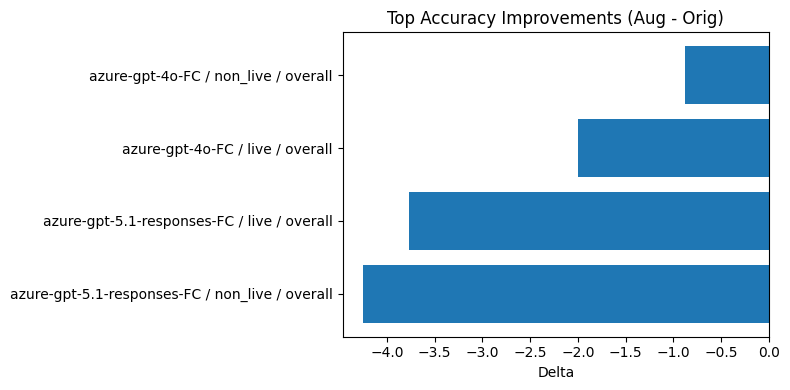

In [22]:
top = acc_df.head(10)
plt.figure(figsize=(8, 4))
plt.barh(
    top["model"] + " / " + top["category"] + " / " + top["subcategory"],
    top["delta"],
)
plt.gca().invert_yaxis()
plt.title("Top Accuracy Improvements (Aug - Orig)")
plt.xlabel("Delta")
plt.tight_layout()
plt.show()

In [23]:
regressions = acc_df.sort_values("delta", ascending=True).head(20)
regressions

,model,category,subcategory,metric_name,orig_value,aug_value,delta,delta_pct,orig_error_file_count,orig_error_item_count,aug_error_file_count,aug_error_item_count
34,azure-gpt-5.1-responses-FC,non_live,overall,non_live_overall_acc,81.81,77.56,-4.25,-0.051950,7,220,7,272
22,azure-gpt-5.1-responses-FC,live,overall,live_overall_acc,63.80,60.03,-3.77,-0.059091,6,632,6,662
2,azure-gpt-4o-FC,live,overall,live_overall_acc,70.10,68.10,-2.00,-0.028531,6,588,6,601
14,azure-gpt-4o-FC,non_live,overall,non_live_overall_acc,84.67,83.79,-0.88,-0.010393,7,199,7,214


In [24]:
from IPython.display import display

for model, df in long_df.groupby("model"):
    print(f"Model: {model}")
    table = df.pivot_table(
        index=["category", "subcategory"],
        columns="metric_name",
        values=["orig_value", "aug_value", "delta"],
        aggfunc="first",
    )
    display(table)

Model: azure-gpt-4o-FC


aug_value                                        \
metric_name          ast_summary irrelevance_detection java_simple_ast   
category subcategory                                                     
live     overall           68.10                 81.22             NaN   
non_live overall           83.79                 85.83            65.0   

                                                                          \
metric_name          javascript_simple_ast live_overall_acc multiple_ast   
category subcategory                                                       
live     overall                       NaN             68.1          NaN   
non_live overall                      72.0              NaN         88.5   

                                                                              \
metric_name          non_live_overall_acc parallel_ast parallel_multiple_ast   
category subcategory                                                           
live     overall                      NaN          NaN                   NaN   
non_live overall                    83.79         92.0                  80.0   

                                          ...           orig_value  \
metric_name          python_multiple_ast  ... non_live_overall_acc   
category subcategory                      ...                        
live     overall                   68.09  ...                  NaN   
non_live overall                     NaN  ...                84.67   

                                                                             \
metric_name          parallel_ast parallel_multiple_ast python_multiple_ast   
category subcategory                                                          
live     overall              NaN                   NaN               70.09   
non_live overall             90.5                  80.0                 NaN   

                                                                       \
metric_name          python_parallel_ast python_parallel_multiple_ast   
category subcategory                                                    
live     overall                    62.5                        66.67   
non_live overall                     NaN                          NaN   

                                                                            
metric_name          python_simple_ast rank relevance_detection simple_ast  
category subcategory                                                        
live     overall                 70.93  1.0                87.5        NaN  
non_live overall                 90.00  1.0                 NaN      76.67  

[2 rows x 48 columns]

Model: azure-gpt-5.1-responses-FC


aug_value                                        \
metric_name          ast_summary irrelevance_detection java_simple_ast   
category subcategory                                                     
live     overall           60.03                 86.65             NaN   
non_live overall           77.56                 88.75            63.0   

                                                                          \
metric_name          javascript_simple_ast live_overall_acc multiple_ast   
category subcategory                                                       
live     overall                       NaN            60.03          NaN   
non_live overall                      64.0              NaN         82.5   

                                                                              \
metric_name          non_live_overall_acc parallel_ast parallel_multiple_ast   
category subcategory                                                           
live     overall                      NaN          NaN                   NaN   
non_live overall                    77.56         80.5                  77.5   

                                          ...           orig_value  \
metric_name          python_multiple_ast  ... non_live_overall_acc   
category subcategory                      ...                        
live     overall                   60.87  ...                  NaN   
non_live overall                     NaN  ...                81.81   

                                                                             \
metric_name          parallel_ast parallel_multiple_ast python_multiple_ast   
category subcategory                                                          
live     overall              NaN                   NaN               63.15   
non_live overall             86.5                  80.0                 NaN   

                                                                       \
metric_name          python_parallel_ast python_parallel_multiple_ast   
category subcategory                                                    
live     overall                   56.25                        66.67   
non_live overall                     NaN                          NaN   

                                                                            
metric_name          python_simple_ast rank relevance_detection simple_ast  
category subcategory                                                        
live     overall                 66.67  2.0               68.75        NaN  
non_live overall                 87.75  2.0                 NaN      72.25  

[2 rows x 48 columns]